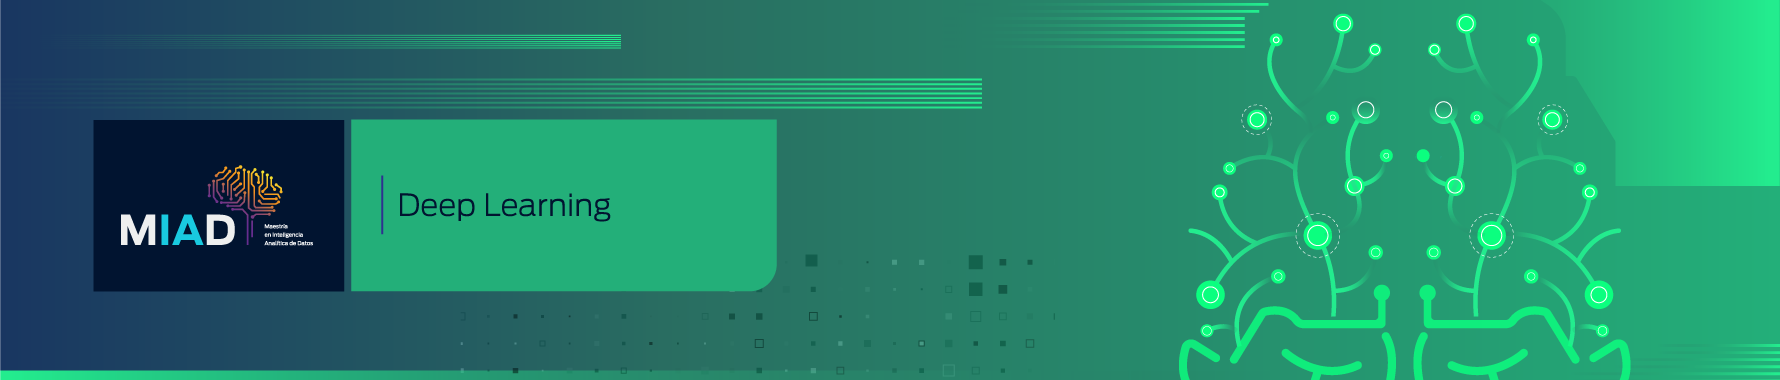

# Redes neuronales usando keras: Comparación de estrategias de regularización


## Actividad calificada por el personal


### Propósito 
En este notebook se pretende evaluar el uso de keras al aplicar una red neuronal en un contexto real haciendo uso de mecanismos de regularización tales como *drop out*, *early stopping*, norma 1 y norma 2 haciendo uso del paquete Keras.

### Instrucciones generales
1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios a evaluar
Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. Realice la partición de la muestra en _train_ y _test_. [5 puntos]

Estimación de un modelo utilizando redes neuronales con *dropout*: Se estima el modelo usando una red neuronal con *dropout* , se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con *early stopping*: Se estima el modelo usando una red neuronal con *early stopping*, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 1: Se estima el modelo usando una red neuronal con norma 1, se evalúa en la muestra de test. [20 puntos]

Estimación de un modelo utilizando redes neuronales con norma 2: Se estima el modelo usando una red neuronal con norma 2, se evalúa en la muestra de test. [20 puntos]

Comparación de modelos: Se elige la mejor regularización a partir de una comparación. [15 puntos]

#### Problema
Un manager de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

### Librerías a importar

In [3]:
import time
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from matplotlib.image import imread
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerías específicas de Keras/TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import regularizers


### 1. Análisis preliminar de variables [5 puntos]
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [4]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
df = pd.read_csv("BankChurners.csv")
df = df.drop(columns=['CLIENTNUM', 
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=categorical_cols)
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Months_on_book            10127 non-null  int64  
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Months_Inactive_12_mon    10127 non-null  int64  
 6   Contacts_Count_12_mon     10127 non-null  int64  
 7   Credit_Limit              10127 non-null  float64
 8   Total_Revolving_Bal       10127 non-null  int64  
 9   Avg_Open_To_Buy           10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

Attrition_Flag              0.0
Customer_Age                0.0
Dependent_count             0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [9]:
cols = 4
rows = len(df.columns) // cols + (len(df.columns) % cols > 0)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=df.columns)
for i, column in enumerate(df.columns):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Histogram(x=df[column], name=column),
        row=row, col=col
    )
fig.update_layout(height=300 * rows, width=1000, title_text="Histogramas de las Variables")
fig.show()

In [10]:
corr = df.corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    annotation_text=corr.round(2).values,
    colorscale='Earth',
    showscale=True
)

fig.update_layout(
    title='Matriz de Correlación Interactiva',
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    width=800,
    height=800
)

fig.show()

#### Conclusiones del análisis preliminar de variables

1. Iniciamos con un conjunto de datos que contenía variables categóricas. Decidimos eliminar tres de ellas siguiendo las indicaciones del conjunto de datos original, además de la columna de identificación del cliente. Luego, convertimos la variable a predecir, "Attrition_Flag", en valores binarios (1 y 0). Posteriormente, eliminamos las variables categóricas restantes según las indicaciones del cuaderno de notas.

2. Realizamos un análisis de calidad de datos para detectar valores faltantes y no encontramos ninguno. Aunque observamos valores extremos tanto altos como bajos en ciertas variables en los histogramas, decidimos mantener todas las variables y evaluar su contribución al modelo utilizando una red neuronal.

3. Al analizar la matriz de correlación, identificamos que las variables más correlacionadas son "Total_Trans_Ct", "Total_CT_Chng_Q4_Q1", "Total_Revolving_Bal", "Contacts_Count_12_mom" y "Months_Inactive_12_mon". Esto sugiere que estas variables pueden tener una relación significativa entre sí, lo que puede influir en el rendimiento del modelo.

En general, la mayoría de los clientes (aproximadamente el 84%) son existentes,la edad promedio de los clientes es de alrededor de 46 años, con una antigüedad promedio de aproximadamente 36 meses en el banco. Tambien, los clientes tienen en promedio alrededor de 3.81 cuentas relacionadas y han estado inactivos en promedio alrededor de 2.34 meses en los últimos 12 meses. En términos de límites de crédito y saldos, hay una variación significativa, con límites de crédito que van desde $1438.30 hasta $34516.00 y saldos pendientes que van desde $0.00 hasta $2517.00. Además, los clientes realizan transacciones con un monto promedio de aproximadamente $4404.09 y una cantidad promedio de transacciones de aproximadamente 64.86.    Estos hallazgos nos proporcionan una visión general del comportamiento de los clientes que tienen tarjetas de crédito.



In [19]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### 2. Estimación de un modelo utilizando redes neuronales con *dropout* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **probabilidad de 0.25**.

In [20]:
modeldp = Sequential()
modeldp.add(Input(shape=(14,)))
modeldp.add(Dense(30,activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(20, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(1, activation='sigmoid'))

In [21]:
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
historydp=modeldp.fit(X_train, y_train, epochs=25, batch_size=10 )

Epoch 1/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6764 - loss: 456.8886
Epoch 2/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7641 - loss: 23.2422
Epoch 3/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8163 - loss: 3.1546
Epoch 4/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8260 - loss: 1.8332
Epoch 5/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8348 - loss: 0.7932
Epoch 6/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.7924
Epoch 7/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.7270
Epoch 8/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8253 - loss: 0.5833
Epoch 9/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8319 - loss: 0.5409
Epoch 10/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8480 - loss: 0.5430
Epoch 11/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8382 - loss: 0.4506
Epoch 12/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

In [23]:
_, accuracy = modeldp.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8499 - loss: 0.3985
Accuracy: 83.68


In [24]:
prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in prediccionesdp]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


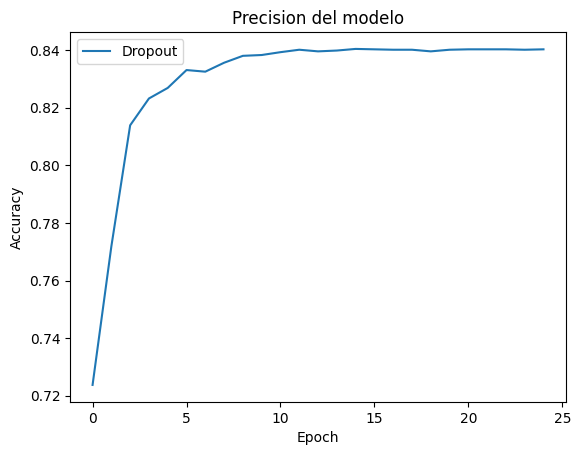

In [25]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historydp.history['accuracy'])
plt.legend(['Dropout'], loc='upper left')
plt.show()

Para este punto estimamos el modelo de redes neuronales de tres capas con regularización de  dropout, la cual impone la restricción de que algunos pesos sean iguales a cero con la probabilidad de 0,25, entrenamos el modelo con los datos de entrenamiento y se evalúa con los de test.

El modelo alcanzo una precisión del 83.68% en los datos de prueba, lo que nos quiere decir que el modelo es capaz de predecir con precisión si un cliente renunciará a su tarjeta de crédito en aproximadamente el 83.68% de los casos.


### 3. Estimación de un modelo utilizando redes neuronales con *early stopping* [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando una **paciencia de 2**.

In [32]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
modeles = Sequential()
modeles.add(Input(shape=(14,)))
modeles.add(Dense(50,activation='relu'))
modeles.add(Dense(25, activation='relu'))
modeles.add(Dense(1, activation='sigmoid'))

In [33]:
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
historyes = modeles.fit(X_train, y_train, epochs=25, batch_size=10,callbacks= [EarlyStopping(monitor='val_accuracy', patience=2)])


Epoch 1/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7654 - loss: 52.8989
Epoch 2/25
 53/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 15.6187

C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning:

Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss



709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 14.5091
Epoch 3/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7957 - loss: 9.9673
Epoch 4/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8042 - loss: 10.0704
Epoch 5/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8034 - loss: 6.1657
Epoch 6/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8224 - loss: 5.4749
Epoch 7/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 6.0925
Epoch 8/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8089 - loss: 5.4737
Epoch 9/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8080 - loss: 4.6137
Epoch 10/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 3.9578
Epoch 11/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8315 - loss: 4.2861
Epoch 12/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8321 - loss: 2.3029
Epoch 13/25
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accur

In [38]:
_, accuracy = modeles.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3546
Accuracy: 86.57


In [39]:
prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


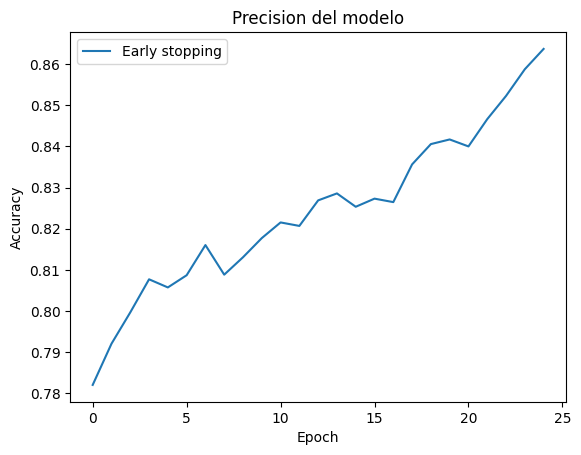

In [40]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(historyes.history['accuracy'])
plt.legend(['Early stopping'], loc='upper left')
plt.show()

En este punto utilizamos nuevamente un modelo de redes neuronales de 3 capas densas y con regularización de early stopping, que hace que el procedimiento de optimización de gradiente descendiente no se realice hasta su convergencia, sino que se detenga de manera temprana para así evitar el sobreajuste de los datos, evitando una función de pérdida muy baja, para esto utilizamos una paciencia de 2, y entrenamos el modelo con los datos de entrenamiento y se evalúo con los de test.

El 86.57% de accuracy nos indica que el modelo tiene una precisión del 86.57% en la predicción de si un cliente renunciará a su tarjeta de crédito o no, en función de los datos disponibles durante la evaluación en los datos de prueba.

### 4. Estimación de un modelo utilizando redes neuronales con norma 1 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [41]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
model1 = Sequential()
model1.add(Input(shape=(14,)))
model1.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l1(0.001)))
model1.add(Dense(1, activation='sigmoid'))

In [42]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history1=model1.fit(X_train, y_train, epochs=30, batch_size=15,verbose=1 )

Epoch 1/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8794 - loss: 0.3147
Epoch 2/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8796 - loss: 0.3211
Epoch 3/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3222
Epoch 4/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8847 - loss: 0.3023
Epoch 5/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8660 - loss: 0.3291
Epoch 6/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.3231
Epoch 7/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8803 - loss: 0.3175
Epoch 8/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8825 - loss: 0.3149
Epoch 9/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8793 - loss: 0.3117
Epoch 10/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8745 - loss: 0.3147
Epoch 11/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.3163
Epoch 12/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [70]:
_, accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3095
Accuracy: 87.76


In [71]:
predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


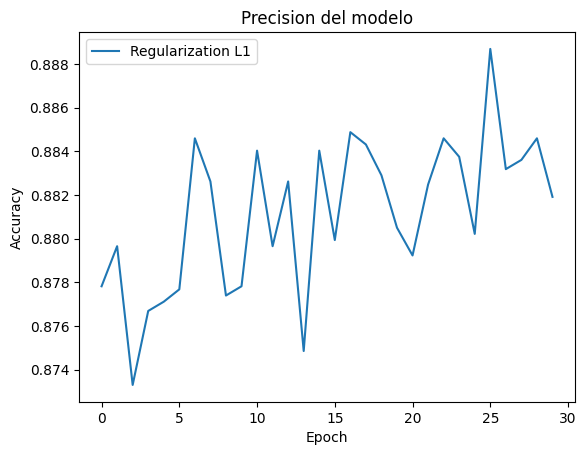

In [72]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.legend(['Regularization L1'], loc='upper left')
plt.show()

Para este caso, utilizamos un modelo de redes neuronales de 3 capas densas con norma 1 y un Alpha de 0,001, también entrenamos el modelo con 30 ephocs, 15 tamaños de lotes para mejorar el accuracy y finalmente se entrenó el modelo con los datos de entrenamiento y se evalúo con los de test.

El modelo alcanzó una precisión del 87.76% en los datos de prueba después del entrenamiento, pero demuestra tener mucho overfitting. 

### 5. Estimación de un modelo utilizando redes neuronales con norma 2 [20 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test utilizando un **_alpha_ de 0.001**.

In [52]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
model2 = Sequential()
model2.add(Input(shape=(14,)))
model2.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))

In [53]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
history2=model2.fit(X_train, y_train, epochs=10, batch_size=10 )

Epoch 1/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 1.0026
Epoch 2/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8469 - loss: 0.6420
Epoch 3/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8640 - loss: 0.4201
Epoch 4/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8602 - loss: 0.3825
Epoch 5/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8579 - loss: 0.3738
Epoch 6/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3710
Epoch 7/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8567 - loss: 0.3702
Epoch 8/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8637 - loss: 0.3602
Epoch 9/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3820
Epoch 10/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8461 - loss: 0.3801


In [63]:
_, accuracy = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3833
Accuracy: 84.30


In [64]:
predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


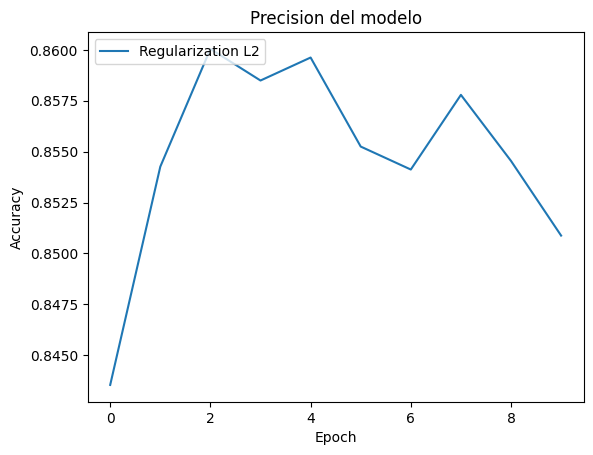

In [65]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history2.history['accuracy'])
plt.legend(['Regularization L2'], loc='upper left')
plt.show()

Finalmente estimamos el modelo de redes neuronales de 3 capas con norma 2 y un Alpha de 0,001, también entrenamos el modelo con 10 ephocs y 10 tamaños de lotes para mejorar el accuracy , finalmente se entrenó el modelo con los datos de entrenamiento y se evalúo con los de test.

De esta manera se obtuvo una precisión del 84.30% en los datos de prueba, lo que nos indica que el modelo es capaz de predecir con precisión si un cliente renunciará a su tarjeta de crédito en aproximadamente el 84.30% de los casos.


### 6. Comparación de modelos de regularización [15 puntos]

Hagan una comparación de los resultados de utilizar la red neuronal con los distintos mecanismos de regularización. Analice los resultados. 


In [73]:
##### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3095
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3833
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8499 - loss: 0.3985
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3546  


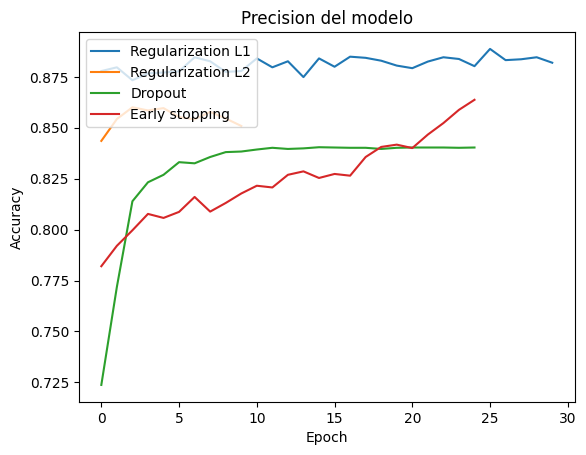

In [75]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

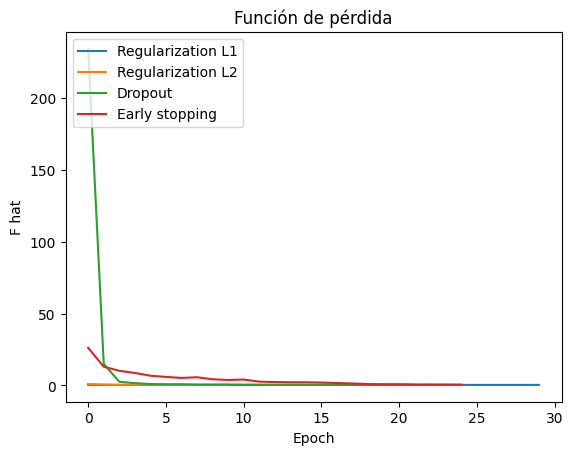

In [76]:
# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()


#### Análisis de los modelos:

Para poder hacer la comparación y análisis de cada uno de los modelos realizados, realizamos un grafico con las precisiones de los modelos y otro con las funciones de perdida, donde podemos ver:

Modelo con Dropout:
* Precisión en datos de prueba: 83.68%
* Pérdida en datos de prueba: 0.3985

Modelo con Early Stopping:
* Precisión en datos de prueba: 86.57%
* Pérdida en datos de prueba: 0.3095

Modelo con Norma 1:
* Precisión en datos de prueba: 87.76%
* Pérdida en datos de prueba: 0.3095

Modelo con Norma 2:
* Precisión en datos de prueba: 84.30%
* Pérdida en datos de prueba: 0.3833

El modelo con regularización de norma 1 mostro la mejor precisión en datos de prueba (87.76%), seguido por el modelo con Early Stopping (86.57%), y luego el modelo con regularización de norma 2 (84.30%). El modelo con Dropout tiene la precisión más baja (83.68%). Los modelos con regularización (L1 y L2) parecen ser mejor que el modelo con Dropout, lo que puede decir que estas técnicas de regularización están ayudando a evitar el sobreajuste.

De acuerdo con estos resultados, la regularización con norma 1 parece ser la técnica más efectiva para este conjunto de datos en particular, ya que produce el mejor rendimiento en los datos de prueba y la menor perdida de datos, de igual manera se deben seguir calibrando los modelos para encontrar el mejor resultado.
